In [2]:
import seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

### 1

Let’s start by seeing what the data looks like. Begin by loading the data into a variable named flags using Panda’s pd.read_csv() function. 

In [26]:
flags = pd.read_csv("flag.data", 
                    names = ['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language', 
                             'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
                             'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
                             'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
                             'Text', 'Topleft', 'Botright'])

### 2

We’re eventually going to use create a decision tree to classify what Landmass a country is on.

Create a variable named labels and set it equal to only the "Landmass" column from flags.

In [25]:
labels = flags[["Landmass"]]

### 3 

We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

You could spend a lot of time playing with groups of columns to find the that work best. But for now, let’s see if we can predict where a country is based only on the colors of its flag.

Create a variable named data and set it equal to a DataFrame containing the following columns from flags:
"Red", "Green", "Blue", "Gold", "White", "Black", "Orange"

In [30]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]

### 4

Finally, let’s split these DataFrames into a training set and test set using the train_test_split() function. This function should take data and labels as parameters. Also include the parameter random_state = 1.

This function returns four values. Name those values train_data, test_data, train_labels, and test_labels in that order.

In [32]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

### 5

Create a DecisionTreeClassifier and name it tree. When you create the tree, give it the parameter random_state = 1.

Call tree‘s .fit() method using train_data and train_labels to fit the tree to the training data.

In [36]:
tree = DecisionTreeClassifier(random_state=1)

tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

### 6


Call .score() using test_data and test_labels. Print the result.

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

In [38]:
score1 = tree.score(test_data, test_labels)

print(score1)

0.3469387755102041


### 7

We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named i that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter max_depth = i.

We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.

In [43]:
depths = list(range(1,21))
scores = []
for md in depths:
    tree = DecisionTreeClassifier(random_state=1, max_depth=md)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

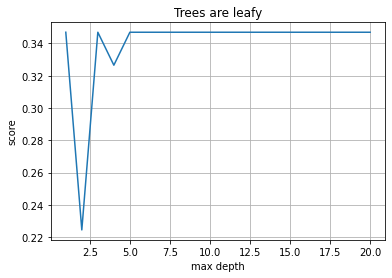

In [52]:
fig, ax = plt.subplots()
ax.plot(depths, scores)
ax.set(xlabel='max depth', ylabel='score', title='Trees are leafy')
ax.grid()
plt.show()

### 8

Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features.

Let’s add all the features that have to do with shapes to our data. data should now be set equal to:

flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses","Saltires","Quarters","Sunstars", "Crescent","Triangle"]]

What does your graph look like after making this change?

In [78]:
# First we put all the previous steps into a function
def create_tree(df, label_names, feature_names):
    labels = df[label_names]
    data = df[feature_names]
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)
    
    depths = list(range(1,21))
    scores = []
    for md in depths:
        tree = DecisionTreeClassifier(random_state=1, max_depth=md)
        tree.fit(train_data, train_labels)
        scores.append(tree.score(test_data, test_labels))
    
    best_score = max(scores)
    best_score_index = scores.index(best_score)
    best_depth = depths[best_score_index]
    print("Best score is {s}, using max depth of {d}".format(s=best_score, d=best_depth))
    
    fig, ax = plt.subplots()
    ax.plot(depths, scores)
    ax.set(xlabel='max depth', ylabel='score', title='Trees are leafy')
    ax.grid()
    plt.show()
    
    best_tree = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
    return best_tree

Best score is 0.5510204081632653, using max depth of 4


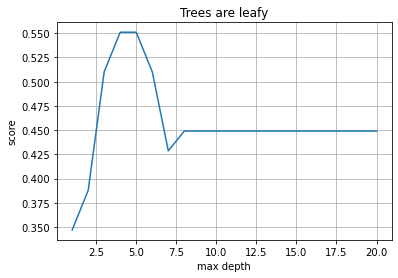

In [79]:
# Now inspect the trees created using 
feature_names = ["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", 
                 "Circles", "Crosses","Saltires","Quarters","Sunstars", "Crescent", "Triangle"]
new_tree = create_tree(flags, ["Landmass"], feature_names)